<a href="https://colab.research.google.com/github/bhrshabani/house-price/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Table of Contents**

**Loading the data/libraries**

**Data description**

**Exploratory Data Analysis (EDA)**

   1. Missing values 
   2. Numerical
   3. Outlier
   4. Categorical
   5. Target value distribution
   6. Correration

**preprocess**

1.   Handling missing values
2.   Handling Outlier
3.   Handling Categorical features
5.   Feature Engineering
4.   Transformaton

**Feature Importance**

**Building and Evaluating Models**



**Prediction**
1. LinearRegression
2. Ridge
3. Lasso
4. RandomForestRegressor

#### Data fields

| Variable | Description | 
|------|------|
| SalePrice | sale price in dollars. This is the target variable |
| MSSubClass | The building class |
| MSZoning |The general zoning classification|
|LotFrontage| Linear feet of street connected to property|
|LotArea| Lot size in square feet|
|Street| Type of road access|
| Alley| Type of alley access|
|LotShape| General shape of property|
| LandContour| Flatness of the property
|Utilities|Type of utilities available|
|LotConfig|Lot configuration|
|LandSlope|Slope of property|
|Neighborhood|Physical locations within Ames city limits|
|Condition1|Proximity to main road or railroad|
|Condition2| Proximity to main road or railroad (if a second is present)|
|BldgType|Type of dwelling|
| HouseStyle| Style of dwelling|
|OverallQual|Overall material and finish quality|
|OverallCond|Overall condition rating|
 |YearBuilt|Original construction date|
|YearRemodAdd|Remodel date|
|RoofStyle| Type of roof|
|RoofMatl|Roof material|
| Exterior1st|Exterior covering on house|
| Exterior2nd| Exterior covering on house (if more than one material)|
| MasVnrType|Masonry veneer type|
| MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Exterior material quality|
| ExterCond| Present condition of the material on the exterior|
|Foundation| Type of foundation|
|BsmtQual| Height of the basement|
|BsmtCond| General condition of the basement|
| BsmtExposure| Walkout or garden level basement walls|
|BsmtFinType1| Quality of basement finished area|
|BsmtFinSF1| Type 1 finished square feet|
|BsmtFinType2| Quality of second finished area (if present)|
|BsmtFinSF2| Type 2 finished square feet|
| BsmtUnfSF| Unfinished square feet of basement area|
| TotalBsmtSF| Total square feet of basement area|
|Heating| Type of heating|
| HeatingQC| Heating quality and condition|
| CentralAir| Central air conditioning|
| Electrical| Electrical system|
 |  1stFlrSF| First Floor square feet|
|  2ndFlrSF| Second floor square feet|
|  LowQualFinSF| Low quality finished square feet (all floors)|
|   GrLivArea| Above grade (ground) living area square feet|
|   BsmtFullBath| Basement full bathrooms
|   BsmtHalfBath| Basement half bathrooms|
|   FullBath| Full bathrooms above grade|
|  HalfBath| Half baths above grade|
|  Bedroom| Number of bedrooms above basement level|
|  Kitchen| Number of kitchens|
|   KitchenQual| Kitchen quality|
| TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)|
|  Functional| Home functionality rating|
|  Fireplaces| Number of fireplaces|
| FireplaceQu| Fireplace quality|
| GarageType| Garage location|
|  GarageYrBlt| Year garage was built|
|  GarageFinish| Interior finish of the garage|
| GarageCars| Size of garage in car capacity|
 | GarageArea| Size of garage in square feet|
 | GarageQual| Garage quality|
 |  GarageCond| Garage condition|
|  PavedDrive| Paved driveway|
| WoodDeckSF| Wood deck area in square feet|
|OpenPorchSF| Open porch area in square feet|
| EnclosedPorch|Enclosed porch area in square feet|
|3SsnPorch| Three season porch area in square feet|
|ScreenPorch|Screen porch area in square feet|
 |PoolArea| Pool area in square feet|
 |PoolQC|Pool quality|
|Fence| Fence quality|
|MiscFeature| Miscellaneous feature not covered in other categories|
|MiscVal| $Value of miscellaneous feature|
|MoSold: Month Sold|
| YrSold| Year Sold|
| SaleType| Type of sale|
|SaleCondition|Condition of sale|


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import plotly
sns.set_style('white')
%matplotlib inline

from scipy.stats import norm 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


from collections import Counter


import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 1000)
pd.set_option('max_rows',40)
pd.set_option('max_columns',1000)

In [ ]:
#load data
uploaded = files.upload()
#store the data
dataset = pd.read_csv("train.csv")


Saving train.csv to train.csv


In [ ]:
data=dataset.copy()

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
print(data.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
data.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
data.apply(lambda x:x.nunique())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Exploratory Data Analysis


1.   Missing values
2.   Numerical
2.   Outlier
3.   Categorical
5. Target value distribution
6.   Correration

### 1. Missing values
19 features have missing values.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().mean()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [ ]:
data.drop(['Id'], axis=1, inplace= True)

## 2. Numerical Features
-	temporal
- discrete
-continuous

In [ ]:
numerical_features = data.select_dtypes(exclude='object')
print( numerical_features.columns)
print("===============================================")
print('number of Numerical features: {}'.format(len(numerical_features.columns)))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
number of Numerical features: 37


In [ ]:
numerical_features = numerical_features.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

### Temporal

In [ ]:
temporal_val = data.filter(regex='Yr|Year')
print(temporal_val.columns)
print("===============================================")
print('Number of ordinal features: {}'.format(len(temporal_val.columns)))

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], dtype='object')
Number of ordinal features: 4


Chart shows from 2006 until 2007 price of houses increase but after that prices reduce

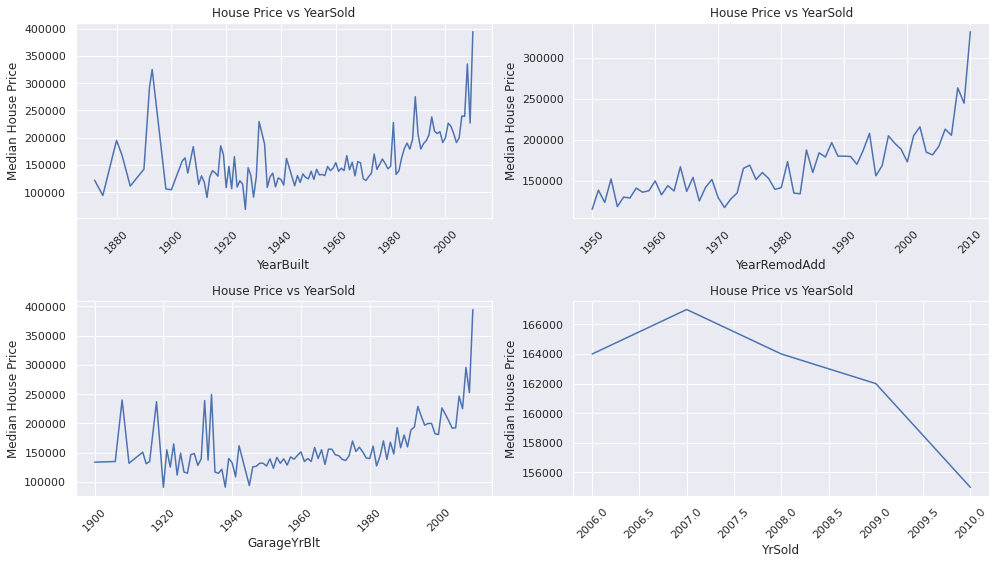

In [ ]:
fig,axes = plt.subplots(figsize=(14,8))
axes.grid(False)
axes.set_yticklabels([])
axes.set_xticklabels([])
sns.set_theme(style="darkgrid")
for idx,num_col in enumerate(temporal_val):
    fig.add_subplot(2, 2, idx+1)
    dataset.groupby(num_col)['SalePrice'].median().plot()
    plt.xlabel(num_col)
    plt.ylabel('Median House Price')
    plt.title("House Price vs YearSold")
    plt.xticks(rotation=45)
    fig.tight_layout()


By looking chart, we realize when the diffrence between house built year , garage built year  and house modified year with the sold year increase, house price decrease

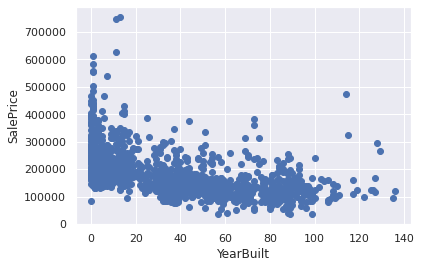

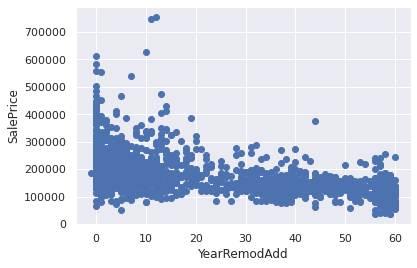

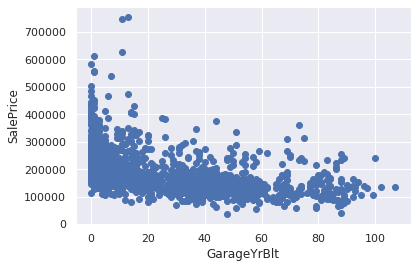

In [ ]:
## Here we will compare the difference between All years feature with SalePrice

for feature in temporal_val:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Discrete

In [ ]:
discrete_val =  numerical_features.select_dtypes(include='int64')
discrete_val = discrete_val.loc[: ,discrete_val.nunique()<25]
print(discrete_val.columns) 
print("===============================================")
print('Number of discrete features : {}'.format(len(discrete_val.columns)))

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',
       'PoolArea', 'MiscVal', 'MoSold'],
      dtype='object')
Number of discrete features : 17


### Continuous

In [ ]:
continuous_val =  numerical_features.drop(discrete_val.columns, axis=1)
print(continuous_val.columns) 
print("===============================================")
print('Number of continuous features : {}'.format(len(continuous_val.columns)))

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')
Number of continuous features : 16


## Univariate

Histograms say distribution of LotFrontage, totalBsmtSf, 1stFlrSF, GrLivArea, GarageArea are same as SalePrice and they are right skewed

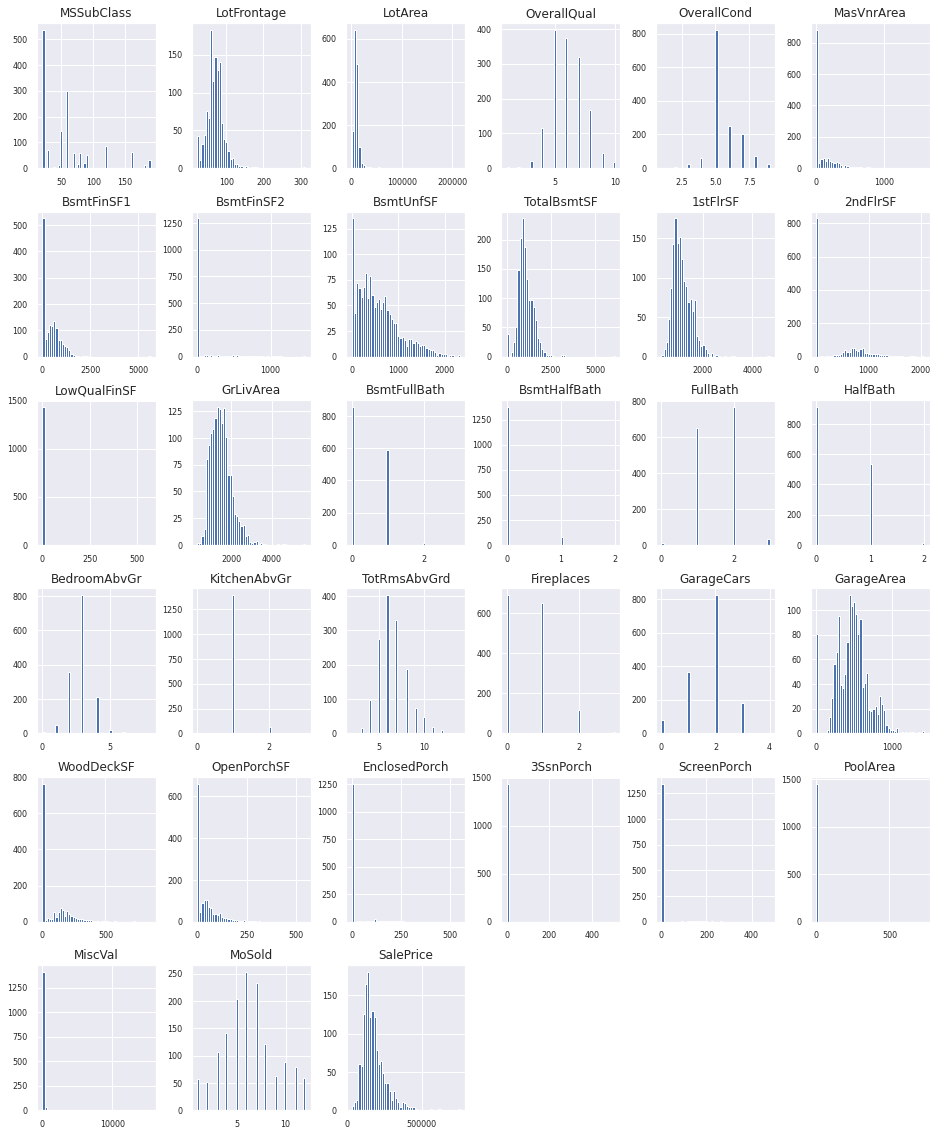

In [ ]:
numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

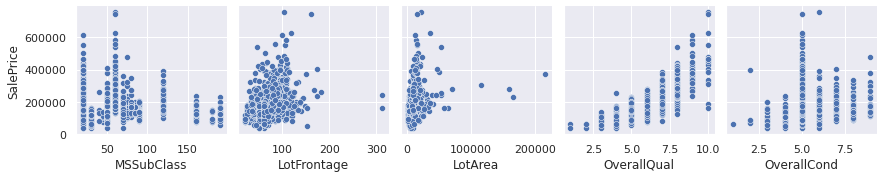

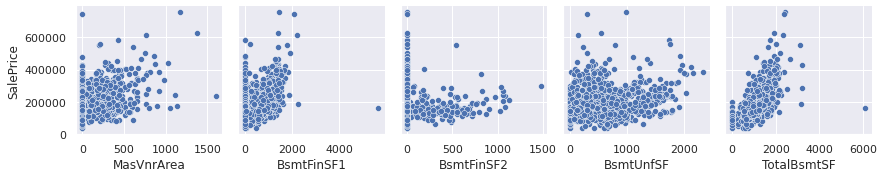

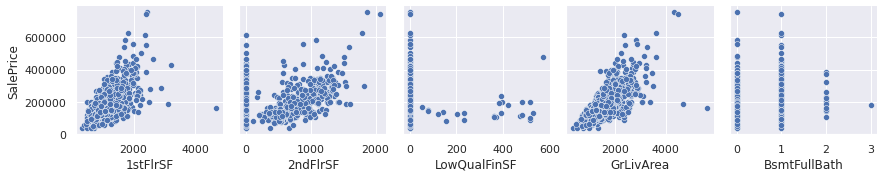

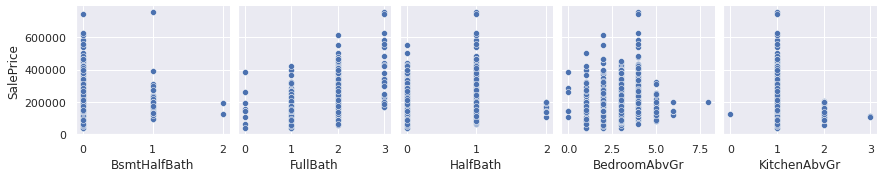

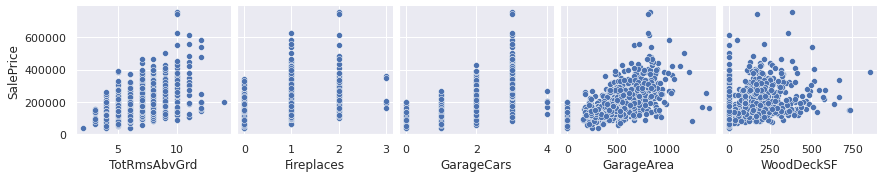

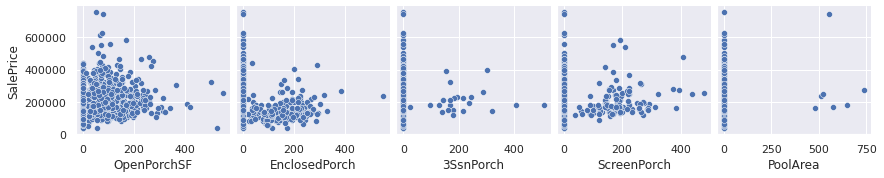

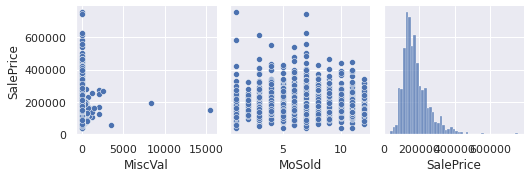

In [ ]:
for i in range(0, len(numerical_features.columns), 5):
    sns.pairplot(data=numerical_features,
                x_vars=numerical_features.columns[i:i+5],
                y_vars=['SalePrice'])

## 3. OUTLIER

With respect to chart there are some outlier values in features

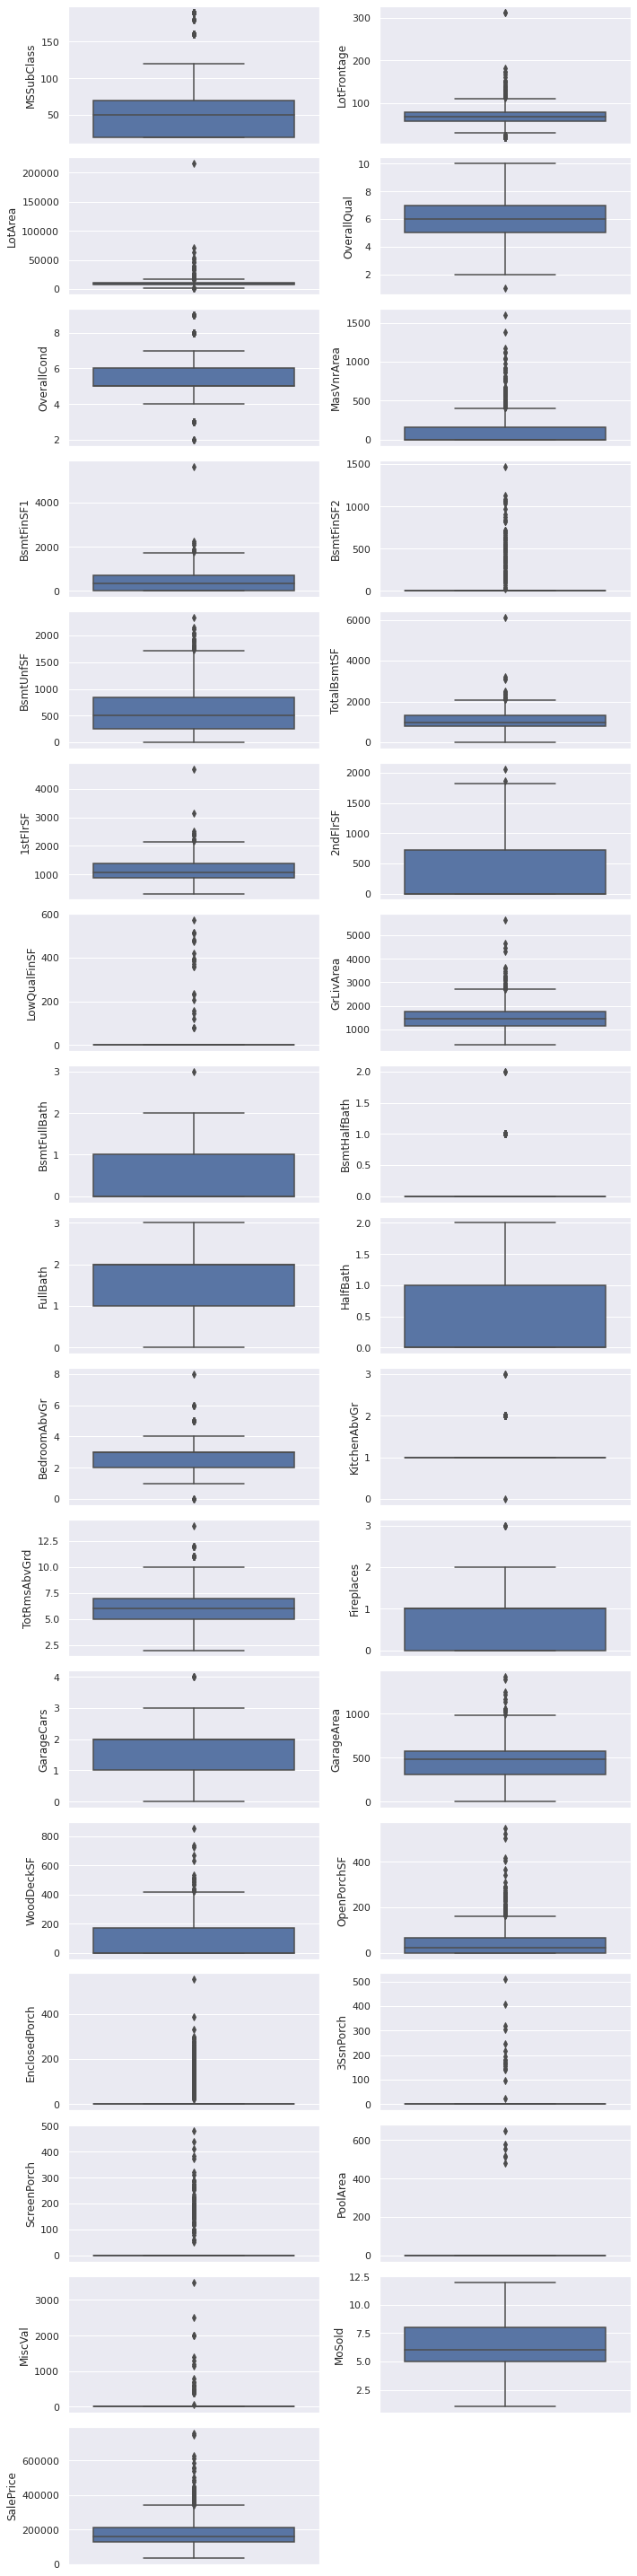

In [ ]:
# Boxplot plot
fig = plt.figure(figsize=(10,40))
for index,col in enumerate(numerical_features):
    plt.subplot(17,2,index+1)
    sns.boxplot(data=numerical_features.dropna(), y=col)
    axes.set_yticklabels([])
    axes.set_xticklabels([])
    fig.tight_layout(pad=1.0)

## 4. Categorical Features

In [ ]:
categorical_features = data.select_dtypes(include='object')
print(categorical_features.columns)
print('===============================================')
print('number of Discrete features: {}'.format(len(categorical_features.columns)))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
number of Discrete features: 43


### Univarite

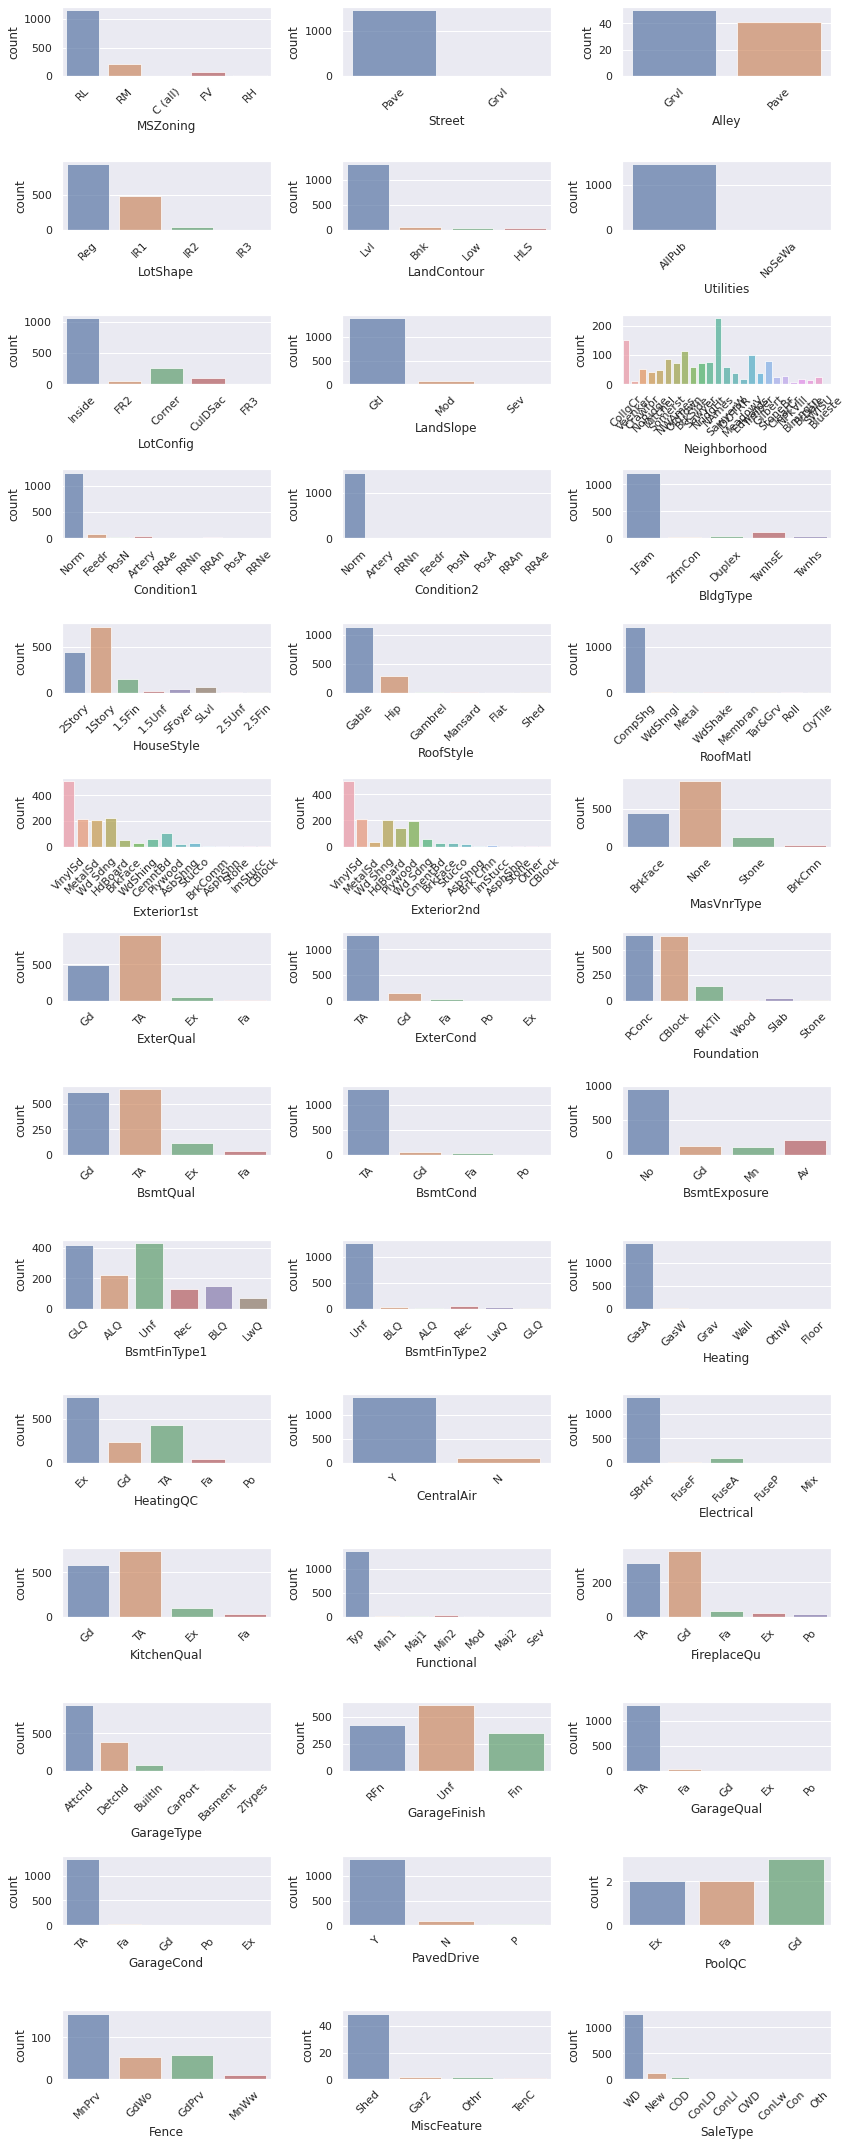

In [ ]:
fig, axes = plt.subplots(round(len(categorical_features.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical_features.columns[i], alpha=0.7, data=categorical_features, ax=ax)

fig.tight_layout()

### Bivariate

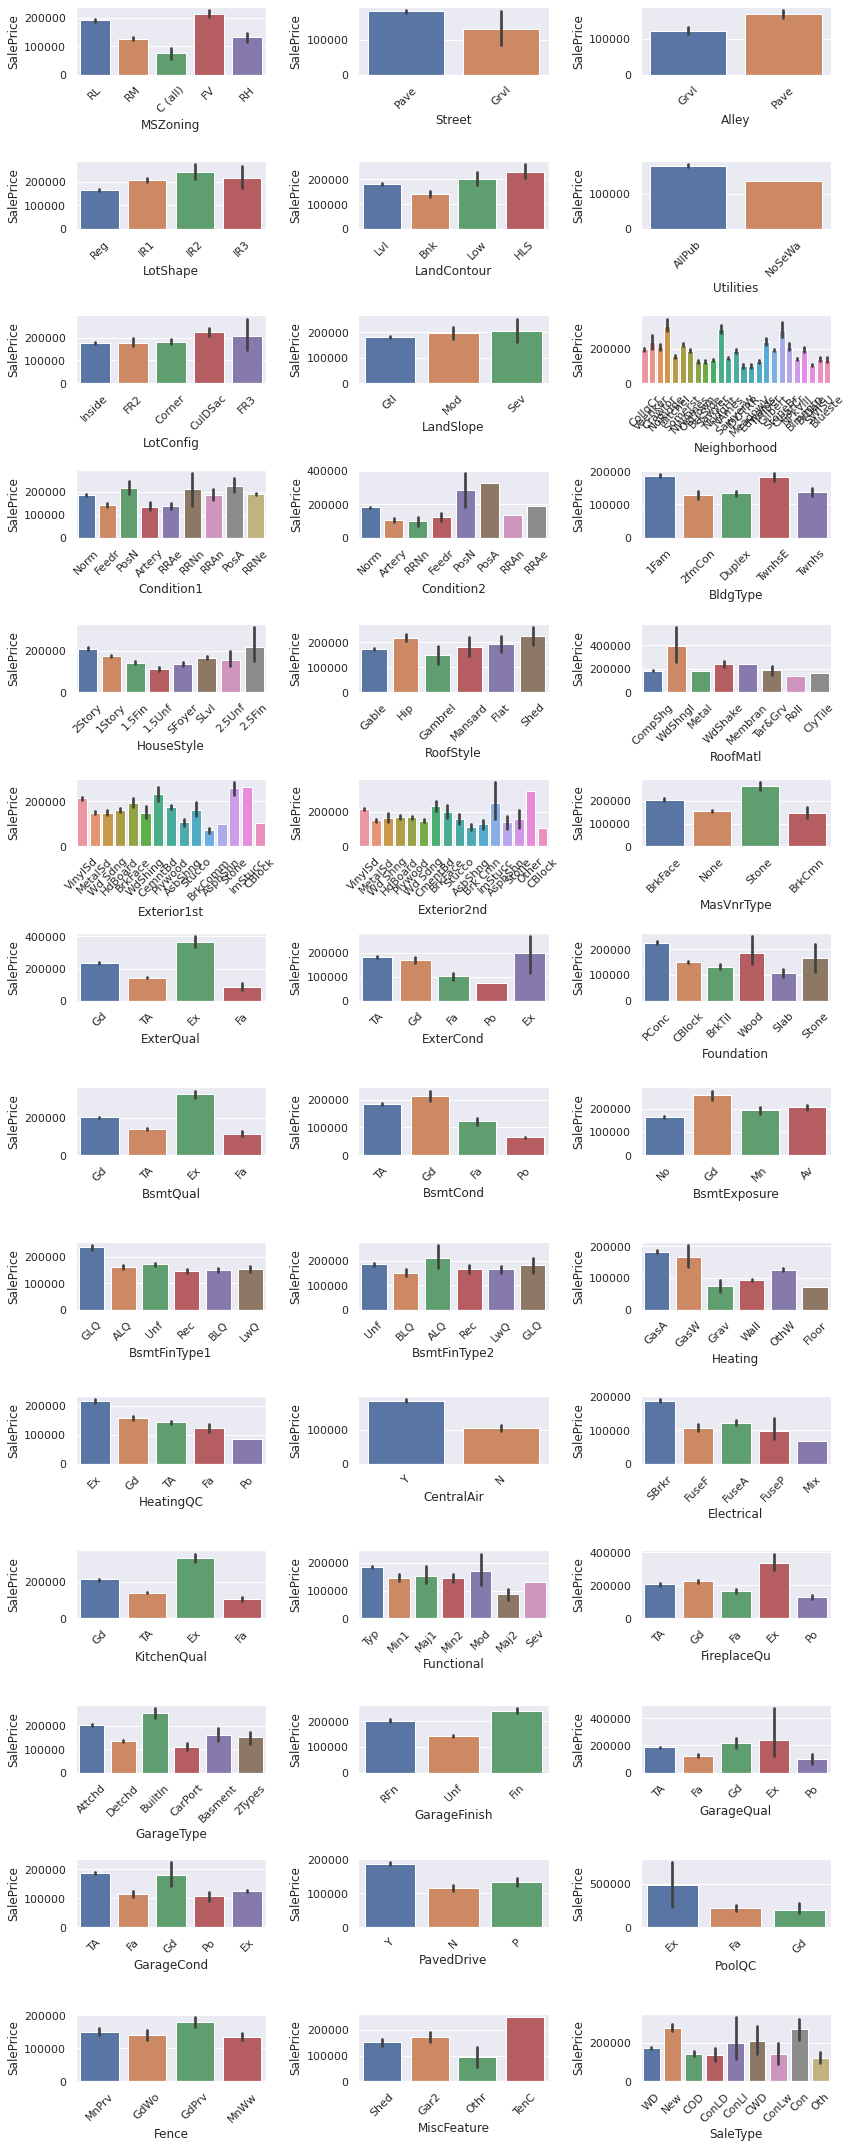

In [ ]:
fig, axes = plt.subplots(round(len(categorical_features.columns) / 3), 3, figsize=(12, 30))
for i, ax in enumerate(fig.axes):
    if i < len(categorical_features.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.barplot(x=data[categorical_features.columns[i]], y="SalePrice", data=data,  ax=ax)
        #sns.countplot(data[categorical_features.columns[i]],'SalePrice',data=data) 
        #sns.barplot(x=data[categorical_features.columns[i]],y="SalePrice", data=data, ax=ax)#sns.barplot(x=categorical_features.columns[i], y="SalePrice", data=data)
fig.tight_layout()

# 5. Target value distribution and skewness






The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed


 mu = 180921.20 and sigma = 79415.29



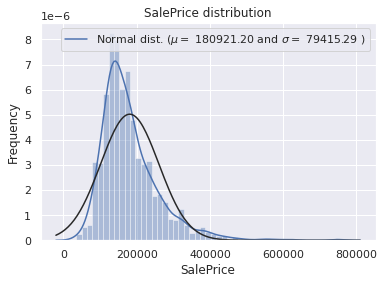

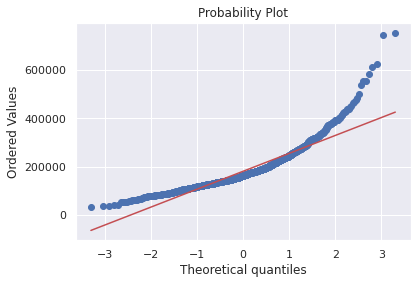

In [ ]:

sns.distplot(data['SalePrice'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
from scipy import stats 
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [ ]:
from scipy.stats import skew
skewed_feats = numerical_features.apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_feats


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
FullBath          0.036524
GarageCars       -0.342197
LotFrontage            NaN
MasVnrArea             NaN
dtype: float64

## 6.Features correlation

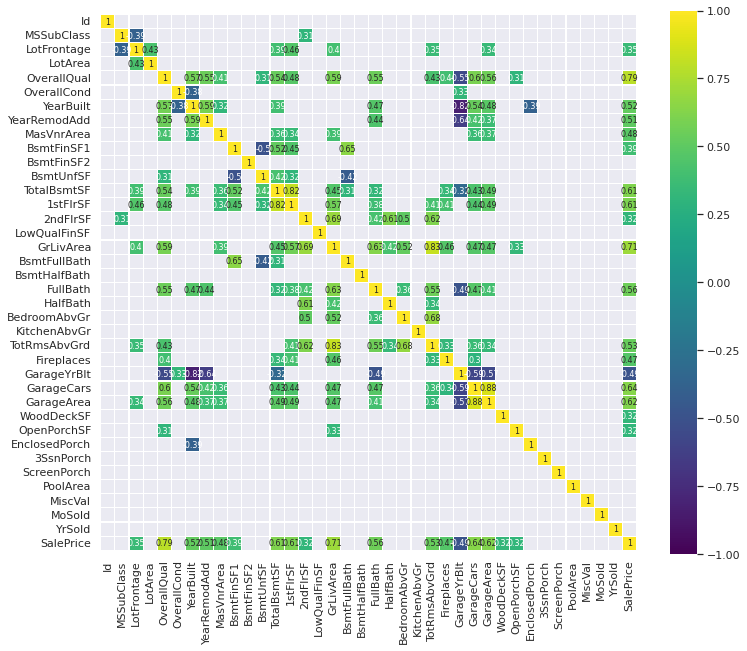

In [ ]:
corr = data.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Preprocess


1.   Handling missing values
2.   Handling Outlier
3.   Handling Categorical features
5.   Feature Engineering
4.   Transformaton


## 1.   Handling missing values

#### Handling numerical missing values with two approch

In [ ]:
numerical_features.isnull().mean()*100

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
SalePrice         0.000000
dtype: float64

In [ ]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

In [ ]:
# numerical_features.drop(['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2','BsmtUnfSF', 
#            '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath','HalfBath',   
#            'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch',
#            'ScreenPorch', 'PoolArea', 'MiscVal','MoSold'], inplace=True, axis=1)

In [ ]:

for feature in numerical_features:
       ##It will have the random sample to fill the na
       random_sample=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
       ##pandas need to have same index in order to merge the dataset
       random_sample.index=data[data[feature].isnull()].index
       data.loc[data[feature].isnull(),feature]=random_sample

#### Handling categorical missing values

In [ ]:
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().mean()*100).sort_values(ascending=False)
cat_missed = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
cat_missed.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945
BsmtFinType2,38,2.602740


Find categorical features with more than 40 percent missing value

In [ ]:
cat_missed[cat_missed['Percent']>40]

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


Features with more than 40 percent filled with 'Missing' value

In [ ]:
features_nan = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
data[features_nan]=data[features_nan].fillna('Missing')

Features with less missing vlaues filled with mode

In [ ]:
for feature in categorical_features.isnull():
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [ ]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


## 2. Handdling Outlier

In [ ]:
def low_upper_band(data, feature):
           #### Lets compute the Interquantile range to calculate the boundaries
           IQR=data[feature].quantile(0.75)-data[feature].quantile(0.25)
           #### Extreme outliers
           lower_bridge=data[feature].quantile(0.25)-(IQR*3)
           upper_bridge=data[feature].quantile(0.75)+(IQR*3)
           return lower_bridge, upper_bridge

In [ ]:

for feature in numerical_features.columns:
  lower_bridge,upper_bridge = low_upper_band(data, feature )
  print(feature, ':')
  print(len(data[data[feature]<lower_bridge]))
  print(len(data[data[feature]>upper_bridge]))
  print('===================')

MSSubClass :
0
0
LotFrontage :
0
14
LotArea :
0
34
OverallQual :
0
0
OverallCond :
1
0
MasVnrArea :
0
25
BsmtFinSF1 :
0
1
BsmtFinSF2 :
0
167
BsmtUnfSF :
0
0
TotalBsmtSF :
0
5
1stFlrSF :
0
3
2ndFlrSF :
0
0
LowQualFinSF :
0
26
GrLivArea :
0
4
BsmtFullBath :
0
0
BsmtHalfBath :
0
82
FullBath :
0
0
HalfBath :
0
0
BedroomAbvGr :
0
1
KitchenAbvGr :
1
67
TotRmsAbvGrd :
0
1
Fireplaces :
0
0
GarageCars :
0
0
GarageArea :
0
3
WoodDeckSF :
0
3
OpenPorchSF :
0
18
EnclosedPorch :
0
208
3SsnPorch :
0
24
ScreenPorch :
0
116
PoolArea :
0
7
MiscVal :
0
52
MoSold :
0
0
SalePrice :
0
12


In [ ]:
outliers = ['TotRmsAbvGrd','GrLivArea','1stFlrSF','TotalBsmtSF', 'OpenPorchSF', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF']

In [ ]:
for feature in outliers:
  lower_bridge,upper_bridge = low_upper_band(data, feature )
  data.drop(data[(data[feature]<lower_bridge) & (data[feature]>upper_bridge)].index, inplace=True)

data.reset_index(drop=True, inplace=True)

## 3. Handling Categorical features

In [ ]:
for feature in categorical_features.columns:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000
7,8,60,RL,63.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Missing,Missing,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,A

In [ ]:
data = pd.get_dummies(data, columns=categorical_features.columns, drop_first=True)
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Rare_var,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_Rare_var,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare_var,Condition2_Rare_var,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_Rare_var,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Rare_var,ExterQual_TA,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rare_var,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Rare_var,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Rare_var,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Rare_var,GarageQual_TA,GarageCond_Rare_var,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Rare_var,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_Rare_var,MiscFeature_Rare_var,MiscFeature_Shed,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,

## 4. Feature Engineering

In [ ]:
## Temporal Variables (Date Time Variables)
data['YearBuilt'] = dataset['YrSold']-data['YearBuilt']
data['YearRemodAdd'] = dataset['YrSold']-data['YearRemodAdd']
data['GarageYrBlt'] = data['GarageYrBlt'].astype('int64')

In [ ]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5
1,31,31,31
2,7,6,7
3,91,36,8
4,8,8,8


In [ ]:
# feture engineering a new feature "TotalFS"
data['TotalSF'] = (data['TotalBsmtSF'] 
                       + data['1stFlrSF'] 
                       + data['2ndFlrSF'])

data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

data['Total_sqr_footage'] = (data['BsmtFinSF1'] 
                                 + data['BsmtFinSF2'] 
                                 + data['1stFlrSF'] 
                                 + data['2ndFlrSF']
                                )
                                 

data['Total_Bathrooms'] = (data['FullBath'] 
                               + (0.5 * data['HalfBath']) 
                               + data['BsmtFullBath'] 
                               + (0.5 * data['BsmtHalfBath'])
                              )
                               

data['Total_porch_sf'] = (data['OpenPorchSF'] 
                              + data['3SsnPorch'] 
                              + data['EnclosedPorch'] 
                              + data['ScreenPorch'] 
                              + data['WoodDeckSF']
                             )

                              

In [ ]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## 5.   Transformaton

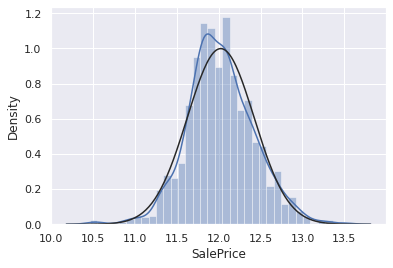

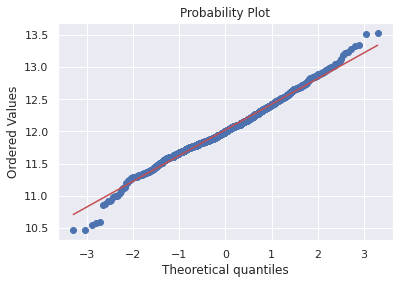

In [ ]:
#applying log transformation on target values
data['SalePrice'] = np.log(data['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


# Find skewed numerical features
skew_features = numerical_features.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)


There are 25 numerical features with Skew > 0.5 :


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
dtype: float64

In [ ]:
# Normalize skewed features
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skew_index:
    data[i] = boxcox1p(data[i], boxcox_normmax(data[i] + 1))


# Model and Predection

In [ ]:
X = data.drop(['SalePrice'] , axis=1)
y = data['SalePrice']

In [ ]:
# split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:

# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00000000e+00, 2.68839696e-01, 1.66955286e-01, 1.69700713e-01,
       5.56302489e-01, 1.02558254e-01, 3.00575506e-01, 2.40889525e-01,
       9.41408079e-02, 1.47842288e-01, 7.55924833e-03, 1.30736335e-01,
       3.71878375e-01, 3.11040929e-01, 2.28298170e-01, 3.12180836e-03,
       4.76657087e-01, 3.66994682e-02, 2.40533133e-02, 2.72515100e-01,
       9.30533181e-02, 7.23431025e-02, 2.08913202e-02, 1.99204412e-01,
       1.79805172e-01, 2.64743254e-01, 3.58099684e-01, 3.44337008e-01,
       8.44320202e-02, 1.76684071e-01, 1.87059070e-02, 0.00000000e+00,
       1.64125840e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.65288189e-03, 5.64164163e-02, 7.45945787e-02,
       1.47802232e-02, 9.26875079e-05, 2.87221094e-03, 5.74385453e-03,
       3.24187630e-03, 8.51606721e-04, 8.05992953e-02, 3.75728999e-03,
       1.08260332e-02, 8.80295015e-03, 0.00000000e+00, 1.27956730e-02,
       0.00000000e+00, 9.19914187e-03, 2.86870579e-04, 1.02438933e-02,
      

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

TotalSF               0.706999
OverallQual           0.556302
GrLivArea             0.476657
Total_sqr_footage     0.433315
TotalBsmtSF           0.371878
                        ...   
LotConfig_FR2         0.000000
Utilities_Rare_var    0.000000
YrSold                0.000000
MoSold                0.000000
Id                    0.000000
Length: 207, dtype: float64

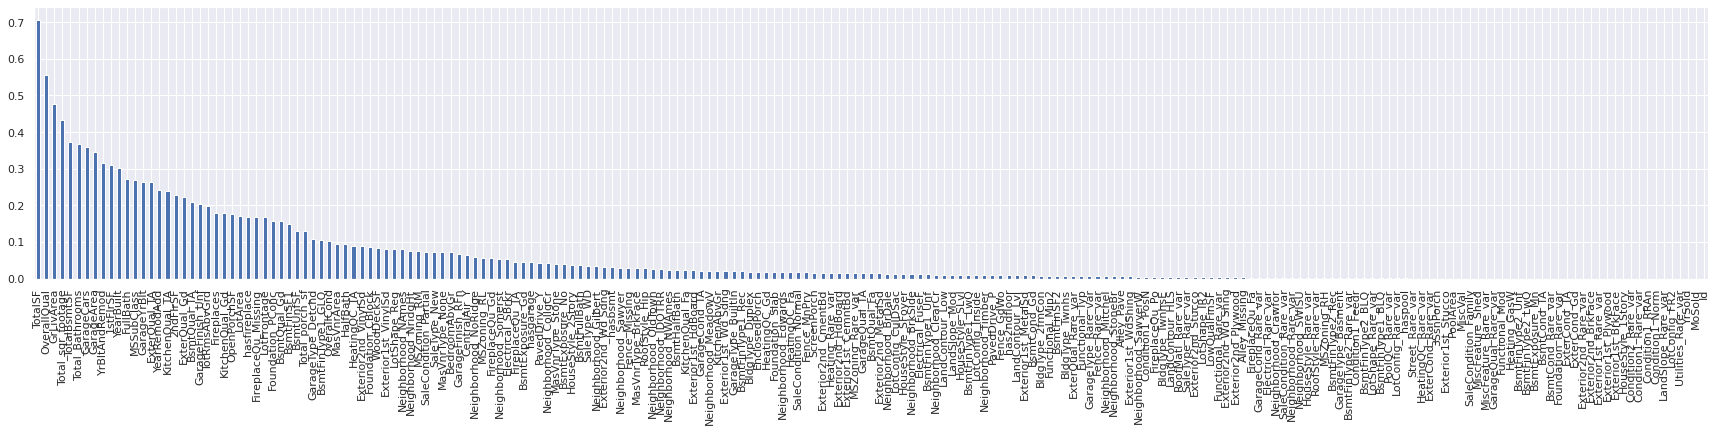

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30,5))

In [ ]:


## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

selected_top_columns.get_support()

X_train.columns[selected_top_columns.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Missing',
       'GarageType_Detchd', 'GarageFinish_Unf', 'TotalSF', 'YrBltAndRemod',
       'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf',
       'hasfireplace'],
      dtype='object')

In [ ]:
X_train = X_train[X_train.columns[selected_top_columns.get_support()]]
X_test = X_test[X_test.columns[selected_top_columns.get_support()]]

In [ ]:
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
pred = lin_reg.predict(X_test)


test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n======================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n=====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Test set evaluation:
MAE: 0.017377595819818892
MSE: 0.0006821209910001855
RMSE: 0.02611744610409267
R2 Square 0.8808435159629365
__________________________________
Train set evaluation:
MAE: 0.016835523337308842
MSE: 0.0005836647411327482
RMSE: 0.024159154396061717
R2 Square 0.899290335066962
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172


In [ ]:



model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n====================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df



Test set evaluation:
MAE: 0.017962911027211887
MSE: 0.0007236274468677153
RMSE: 0.02690032428926676
R2 Square 0.8735929498445086
__________________________________
Train set evaluation:
MAE: 0.017718010010314648
MSE: 0.0007416108096842417
RMSE: 0.02723253219376123
R2 Square 0.8720371972288932
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172
1,Ridge Regression,0.017963,0.000724,0.026900,0.873593,0.898143


In [ ]:


model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n====================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Test set evaluation:
MAE: 0.029873149583570728
MSE: 0.0016986111540545417
RMSE: 0.04121421058390591
R2 Square 0.7032776654967022
__________________________________
Train set evaluation:
MAE: 0.028571770740817865
MSE: 0.0018393237530057722
RMSE: 0.04288733790999125
R2 Square 0.6826300000423378
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172
1,Ridge Regression,0.017963,0.000724,0.026900,0.873593,0.898143
2,Lasso Regression,0.029873,0.001699,0.041214,0.703278,0.646925


In [ ]:


rf_reg = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print('Test set evaluation:\n====================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df



Test set evaluation:
MAE: 0.01859831767675975
MSE: 0.0008220434057146886
RMSE: 0.02867129933774695
R2 Square 0.856401132287118
__________________________________
Train set evaluation:
MAE: 0.01144981775421664
MSE: 0.00031836833761897257
RMSE: 0.017842879185237245
R2 Square 0.9450664630783261
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172
1,Ridge Regression,0.017963,0.000724,0.026900,0.873593,0.898143
2,Lasso Regression,0.029873,0.001699,0.041214,0.703278,0.646925
3,Random Forest Regressor,0.018598,0.000822,0.028671,0.856401,0.000000


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
svr.fit(X_train, y_train)

test_pred = svr.predict(X_test)
train_pred = svr.predict(X_train)


print('Test set evaluation:\n====================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')

results_df_2 = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Test set evaluation:
MAE: 0.016207841619685942
MSE: 0.0006489489994884135
RMSE: 0.02547447741345077
R2 Square 0.8866381739916454
__________________________________
Train set evaluation:
MAE: 0.014878534683330072
MSE: 0.0005241747776640243
RMSE: 0.02289486356508866
R2 Square 0.9095551564028995
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172
1,Ridge Regression,0.017963,0.000724,0.026900,0.873593,0.898143
2,Lasso Regression,0.029873,0.001699,0.041214,0.703278,0.646925
3,Random Forest Regressor,0.018598,0.000822,0.028671,0.856401,0.000000
4,SVM,0.016208,0.000649,0.025474,0.886638,0.000000


In [ ]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       gamma=0.6,
                       random_state=42)

xgboost.fit(X_train, y_train)

test_pred = xgboost.predict(X_test)
train_pred = xgboost.predict(X_train)


print('Test set evaluation:\n====================================')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n====================================')
print_evaluate(y_train, train_pred)
print('results dataframe:\n=====================================')

results_df_2 = pd.DataFrame(data=[["XGBoost", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

[08:02:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
MAE: 0.03398507299765799
MSE: 0.0024360605034576036
RMSE: 0.0493564636441632
R2 Square 0.5744561326753133
__________________________________
Train set evaluation:
MAE: 0.03335330837746733
MSE: 0.0023017003352467195
RMSE: 0.0479760391783932
R2 Square 0.6028482565366458
__________________________________
results dataframe:


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.017378,0.000682,0.026117,0.880844,0.897172
1,Ridge Regression,0.017963,0.000724,0.026900,0.873593,0.898143
2,Lasso Regression,0.029873,0.001699,0.041214,0.703278,0.646925
3,Random Forest Regressor,0.018598,0.000822,0.028671,0.856401,0.000000
4,SVM,0.016208,0.000649,0.025474,0.886638,0.000000
5,XGBoost,0.033985,0.002436,0.049356,0.574456,0.000000
